In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_task=10
epochs=20

def get_mean_acc(acc,epochs):
    num_task=len(acc)
    temp=np.zeros((num_task,len(acc[0])))
    for t,v in acc.items():
        temp[t,range(t * epochs, num_task * epochs)]=v
        if t<num_task-1:
            temp[t+1,:]=temp[:t+1,:].mean(0)
    return temp.mean(0)

def get_mean_acc_on_iterations(acc_list):
    acc = {}
    for i in acc_list[0].keys():
        acc[i] = np.zeros(len(acc_list[0][i]))
    for t in range(len(acc_list)):
        for i in acc_list[0].keys():
            acc[i] += np.array(acc_list[t][i]) / len(acc_list)
    return acc

In [3]:
acc_ewc_list = [[] for i in range(8)]
acc_sketch_ewc_10_list = [[] for i in range(5)]
acc_sketch_ewc_50_list = [[] for i in range(5)]
for i in range(5):
    path_EWC = '.\\perm_mnist_10Run\\experiment_EWC_id_%d.pkl'%(i)
    path_SketchEWC_10 = '.\\perm_mnist_10Run\\experiment_SketchEWC_id_%d_bucket_10.pkl'%(i)
    path_SketchEWC_50 = '.\\perm_mnist_10Run\\experiment_SketchEWC_id_%d_bucket_50.pkl'%(i)
    with open(path_EWC, 'rb') as f:
        _, acc_ewc, hyperparameter_ewc = pickle.load(f)
        for j in range(8):
            acc_ewc_list[j].append(acc_ewc[j])
    with open(path_SketchEWC_10, 'rb') as f:
        _, acc_sketch_ewc_10, hyperparameter_sketch_ewc_10 = pickle.load(f)
        for j in range(5):
            acc_sketch_ewc_10_list[j].append(acc_sketch_ewc_10[j])
    with open(path_SketchEWC_50, 'rb') as f:
        _, acc_sketch_ewc_50, hyperparameter_sketch_ewc_50 = pickle.load(f)
        for j in range(5):
            acc_sketch_ewc_50_list[j].append(acc_sketch_ewc_50[j])

In [4]:
for j in range(8):
    acc_ewc_list[j] = get_mean_acc_on_iterations(acc_ewc_list[j])
for j in range(5):
    acc_sketch_ewc_10_list[j] = get_mean_acc_on_iterations(acc_sketch_ewc_10_list[j])
for j in range(5):
    acc_sketch_ewc_50_list[j] = get_mean_acc_on_iterations(acc_sketch_ewc_50_list[j])

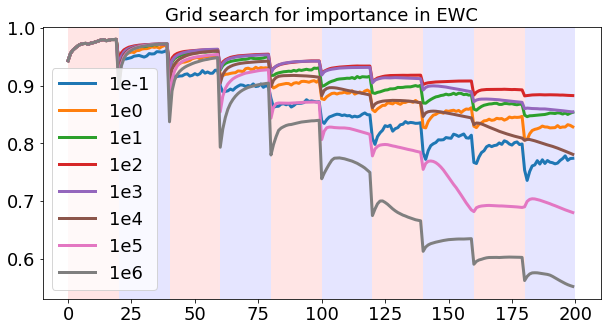

In [5]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(8):
    plt.plot(get_mean_acc(acc_ewc_list[i],epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['1e-1', '1e0', '1e1', '1e2', '1e3', '1e4', '1e5', '1e6'],fontsize=18)
plt.title('Grid search for importance in EWC',fontsize=18)
plt.show()

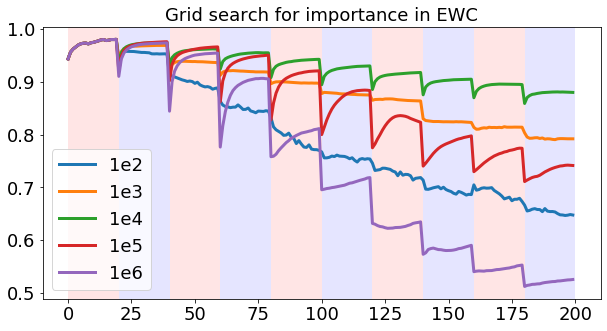

In [6]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(5):
    plt.plot(get_mean_acc(acc_sketch_ewc_10_list[i],epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['1e2', '1e3', '1e4', '1e5', '1e6'],fontsize=18)
plt.title('Grid search for importance in EWC',fontsize=18)
plt.show()

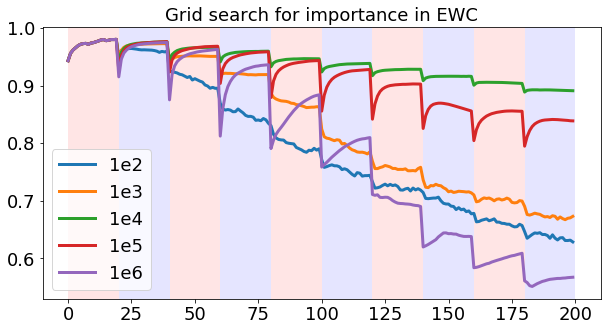

In [7]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(5):
    plt.plot(get_mean_acc(acc_sketch_ewc_50_list[i],epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['1e2', '1e3', '1e4', '1e5', '1e6'],fontsize=18)
plt.title('Grid search for importance in EWC',fontsize=18)
plt.show()

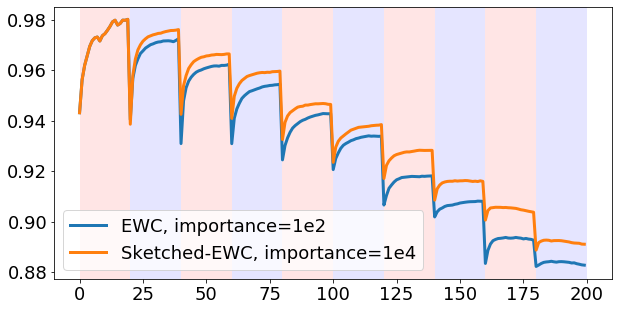

In [19]:
acc_ewc = acc_ewc_list[3]
acc_sketch_ewc = acc_sketch_ewc_50_list[2]

plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_sketch_ewc,epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['EWC, importance=1e2','Sketched-EWC, importance=1e4'],fontsize=18)
# plt.title('5-time grid search results for SketchEWC',fontsize=18)
# plt.figtext(0.5, 0.01, '%d tasks experiment on permuted MNIST'%(num_task), wrap=True, horizontalalignment='center', fontsize=18)
plt.show()


In [9]:
acc_sketch_ewc_buckets_list = [[] for i in range(5)]
for i in range(5):
    path_SketchEWC_buckets = '.\\perm_mnist_10Run\\experiment_SketchEWC_id_%d_bucket_10-50.pkl'%(i)
    with open(path_SketchEWC_buckets, 'rb') as f:
        _, acc_sketch_ewc_buckets, hyperparameter_sketch_ewc_buckets = pickle.load(f)
        for j in range(5):
            acc_sketch_ewc_buckets_list[j].append(acc_sketch_ewc_buckets[j])

In [10]:
for j in range(5):
    acc_sketch_ewc_buckets_list[j] = get_mean_acc_on_iterations(acc_sketch_ewc_buckets_list[j])

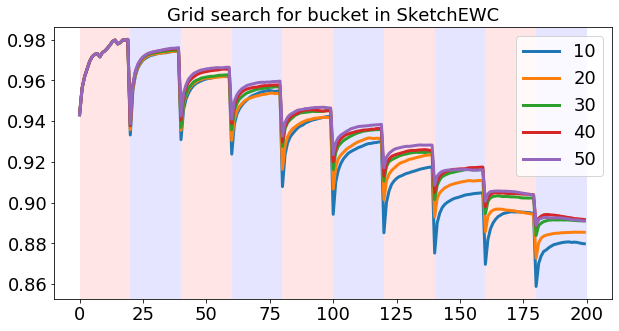

In [11]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(5):
    plt.plot(get_mean_acc(acc_sketch_ewc_buckets_list[i],epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['10', '20', '30', '40', '50'],fontsize=18)
plt.title('Grid search for bucket in SketchEWC',fontsize=18)
plt.show()

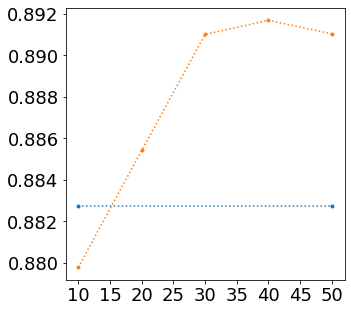

In [12]:
plt.figure(figsize=(5,5))
plt.plot([10,50], [get_mean_acc(acc_ewc,epochs)[-1] for i in range(2)], '.:')
plt.plot([10,20,30,40,50], [get_mean_acc(acc_sketch_ewc_buckets_list[i],epochs)[-1] for i in range(5)], '.:')
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.show()

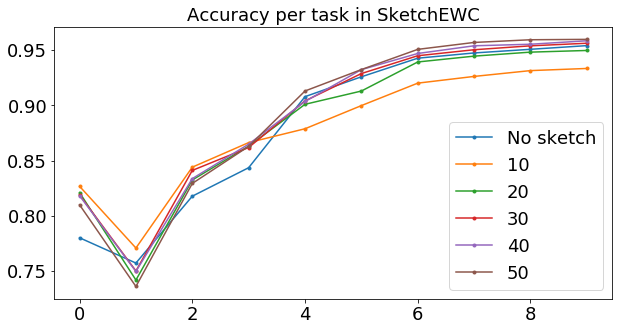

In [15]:
plt.figure(figsize=(10,5))
plt.plot([acc_ewc[j][-1] for j in range(10)],'.-')
for i in range(5):
    plt.plot([acc_sketch_ewc_buckets_list[i][j][-1] for j in range(10)],'.-')
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['No sketch', '10', '20', '30', '40', '50'],fontsize=18)
plt.title('Accuracy per task in SketchEWC',fontsize=18)
plt.show()